# AST326 lab01
### Maxwell Fine 1004714400

Ex 06: Calculation of the Hubble constant using the straight-line linear least squares fitting.
The file has two columns: the
first column is a list of the distances (in unit of mega-parsec [Mpc]) of 13 galaxies in the range
of 12000 Mpc; the second column gives the observed receding velocities of the galaxies in
unit of km s  1 . Using the data in the file, calculate the Hubble constant with its uncertainty by
applying the linear least squares fitting method. You need to use your own codes for this
assignment; in other words, you are NOT allowed to use a built-in Python library for the
fitting.

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np

# data fnames
hubble_f = 'data/Fine-finemaxw-Hubble.txt'

In [2]:
# load data
hubble_data = np.genfromtxt(fname=hubble_f)
distance = hubble_data[:,0] # in Mpc
rec_vel = hubble_data[:,1] # in kms^-1


In [11]:
# least squares fitting

def lin_least_squares(x_arr, y_arr):
    '''write doc string'''
    
    # fits a line! and only a line
    # y = mx + c
    
    # generate vars
    x_mean = np.mean(x_arr)
    y_mean = np.mean(y_arr)
    n = len(x_arr)
    
    # fitt m, and c
    m = np.sum((x_arr -x_mean)*(y_arr-y_mean)) / np.sum((x_arr-x_mean)**2)
    c = y_mean - m*x_mean
    
    # determination of error
    y_pred = m*x_arr +c
    std_2 = (1/(n-2)) * np.sum((y_arr - (m*x_arr +c ))**2)
    
    return m, c, np.sqrt(std_2)/100

# find the associated error in m
    
    

In [12]:
my_m, my_c, std = lin_least_squares(x_arr=distance, y_arr=rec_vel)
print(my_m, my_c, std)

60.24031927752311 996.3405501956004 17.850037149116414


In [13]:
# least squares fitting


x = distance
ye = rec_vel
nx = len(x)

# Construct the matrices
ma = np.array([ [np.sum(x**2), np.sum(x)],[np.sum(x), nx ] ] )
mc = np.array([ [np.sum(x*ye)],[np.sum(ye)]])

# Compute the gradient and intercept
mai = np.linalg.inv(ma)
print('Test matrix inversion gives identity \n',np.dot(mai,ma))
md = np.dot(mai,mc) # matrix multiply is dot

mfit = md[0,0]
cfit = md[1,0]
hubble_c = mfit
std = '5'
round_hubble_c = 60.2
print(hubble_c)

Test matrix inversion gives identity 
 [[ 1.00000000e+00 -2.16840434e-19]
 [ 5.68434189e-14  1.00000000e+00]]
60.24031927752311


In [29]:
cfit

996.3405501956004

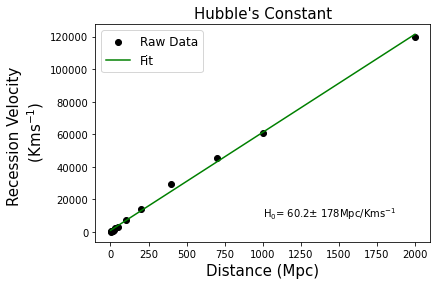

In [10]:
plt.scatter(distance, rec_vel, label="Raw Data", color='k')
plt.plot(distance, my_m* distance + my_c, color='g', label='Fit')
plt.legend(fontsize=12)
plt.figsize=((5,5))
plt.ylabel('Recession Velocity \n (Kms$^{-1}$)', fontsize=15)
plt.xlabel('Distance (Mpc)', fontsize=15)
plt.title('Hubble\'s Constant', fontsize =15)
plt.text(1000,9000, s='H$_0$= ' + str(my_m)[0:4] + '$\pm$ ' + str(std)[0:3] + 'Mpc/Kms$^{-1}$')
plt.savefig('figs/hubble.pdf')

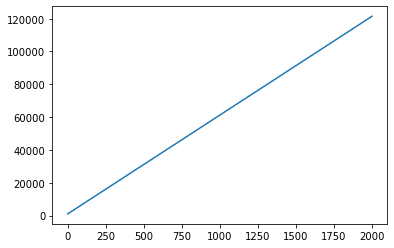

In [30]:
plt.plot(distance, my_m* distance + my_c)

In [21]:
**2rec_vel

array([7.8684289e+01, 3.5613574e+02, 6.3692528e+02, 8.8076669e+02,
       1.1944151e+03, 2.3700929e+03, 3.0161681e+03, 7.1781817e+03,
       1.4432127e+04, 2.9542217e+04, 4.5294745e+04, 6.1102105e+04,
       1.1981875e+05])